### CONTENTS
#### 1 Importing libraries
#### 2 Importing data 
#### 3 Data wrangling
#### 4 ANN model 1
#### 5 ANN model 2
#### 6 ANN model 3
#### 7 ANN model 4
#### 8 ANN model 5

# 1 Importing libraries

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# 2 Importing data

In [161]:
path = r'C:\Users\elena\Documents\06.2025 climatewins machine learning'

In [163]:
# Upload original data

In [165]:
climate = pd.read_csv(os.path.join(path, '02 Data', 'Original data', 'Dataset-weather-prediction-dataset-processed.csv'), index_col = False)

In [167]:
climate.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1                  7               2.1            0.85   
1  19600102      1                  6               2.1            0.84   
2  19600103      1                  8               2.1            0.90   
3  19600104      1                  3               2.1            0.92   
4  19600105      1                  6               2.1            0.95   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           1.018                    0.32                 0.09   
1           1.018                    0.36                 1.05   
2           1.018                    0.18                 0.30   
3           1.018                    0.58                 0.00   
4           1.018                    0.65                 0.14   

   BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0                 0             0.7  ...                     5   
1                 0             1.1  ...                     7   
2                 0             0.0  ...                     7   
3                 0             4.1  ...                     7   
4                 0             5.4  ...                     3   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.88             1.0003                       0.45   
1               0.91             1.0007                       0.25   
2               0.91             1.0096                       0.17   
3               0.86             1.0184                       0.13   
4               0.80             1.0328                       0.46   

   VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                    0.34                    0                4.7   
1                    0.84                    0                0.7   
2                    0.08                    0                0.1   
3                    0.98                    0                0.0   
4                    0.00                    0                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 170 columns]

In [169]:
# Import the pleasant weather data.
pleasantweather = pd.read_csv(os.path.join(path, '02 Data', 'Original Data','Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

# 3 Data wrangling

In [172]:
climate.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed',
       'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation',
       'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine',
       ...
       'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure',
       'VALENTIA_global_radiation', 'VALENTIA_precipitation',
       'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max'],
      dtype='object', length=170)

In [174]:
# Reduce to just the temperature variables (excluding Gdansk, Roma,Tours)
df = climate[['DATE', 'MONTH','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',        
 'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
 'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
 'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
 'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
 'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
 'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
 'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
 'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
 'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
 'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
 'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',   
 'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
 'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']].copy()

In [176]:
df.describe()

DATE         MONTH  BASEL_temp_mean  BASEL_temp_min  \
count  2.295000e+04  22950.000000     22950.000000    22950.000000   
mean   1.990984e+07      6.509630        10.392471        6.317015   
std    1.813833e+05      3.443672         7.363575        6.524121   
min    1.960010e+07      1.000000       -18.500000      -23.300000   
25%    1.975092e+07      4.000000         4.700000        1.400000   
50%    1.991060e+07      7.000000        10.700000        6.500000   
75%    2.007021e+07      9.000000        16.200000       11.500000   
max    2.022103e+07     12.000000        29.200000       22.400000   

       BASEL_temp_max  BELGRADE_temp_mean  BELGRADE_temp_min  \
count    22950.000000        22950.000000       22950.000000   
mean        15.076322           12.659935           8.521094   
std          8.730759            8.811427           7.721044   
min        -14.000000          -17.300000         -21.000000   
25%          8.300000            5.700000           2.500000   
50%         15.400000           13.400000           9.200000   
75%         21.900000           19.800000          14.800000   
max         38.600000           34.600000          27.700000   

       BELGRADE_temp_max  BUDAPEST_temp_mean  BUDAPEST_temp_min  ...  \
count       22950.000000        22950.000000       22950.000000  ...   
mean           17.421516           11.743922           7.971168  ...   
std            10.031285            8.501127           7.478217  ...   
min           -14.300000          -16.500000         -18.100000  ...   
25%             9.500000            4.900000           2.100000  ...   
50%            18.500000           11.800000           8.000000  ...   
75%            25.600000           18.600000          14.100000  ...   
max            43.600000           33.100000          26.000000  ...   

       OSLO_temp_max  SONNBLICK_temp_mean  SONNBLICK_temp_min  \
count   22950.000000         22950.000000        22950.000000   
mean       10.297634            -5.049882           -7.311686   
std         9.261002             6.837712            6.985092   
min       -20.500000           -31.800000          -34.300000   
25%         2.800000            -9.800000          -12.000000   
50%        10.200000            -4.700000           -6.800000   
75%        18.000000             0.100000           -1.900000   
max        34.600000            12.700000           10.400000   

       SONNBLICK_temp_max  STOCKHOLM_temp_mean  STOCKHOLM_temp_min  \
count        22950.000000         22950.000000        22950.000000   
mean            -2.767651             7.343521            4.374980   
std              6.827926             8.038386            7.488771   
min            -31.200000           -23.900000          -25.500000   
25%             -7.400000             1.300000           -0.700000   
50%             -2.600000             7.000000            4.200000   
75%              2.100000            14.100000           10.600000   
max             15.300000            28.300000           22.800000   

       STOCKHOLM_temp_max  VALENTIA_temp_mean  VALENTIA_temp_min  \
count        22950.000000        22950.000000       22950.000000   
mean            10.720227           10.724257           7.901904   
std              9.100872            3.328727           3.659393   
min            -22.100000           -3.500000          -7.300000   
25%              3.400000            8.800000           6.100000   
50%             10.200000           10.700000           7.900000   
75%             18.300000           13.000000          10.300000   
max             35.400000           23.600000          19.500000   

       VALENTIA_temp_max  
count       22950.000000  
mean           13.515752  
std             3.477373  
min            -1.500000  
25%            11.300000  
50%            13.500000  
75%            15.700000  
max            28.400000  

[8 rows x 47 columns]

There are differences in the mean temparature values between weather stations, e.g. mean of average temperatures is 7.9 in Valencia vs 12.7 in Belgrade and there are variations in ranges of temparatures between stations. We do not want the model to give more weight to certain stations simply because of their numeric scale, not their predictive power. So it is best to scale the data before modeling. Scaling ensures all inputs contribute proportionally, which leads to faster convergence and better stability during training.

In [179]:
# Define X and y datasets
# Drop the unneeded columns
X = df.drop(['DATE', 'MONTH'], axis=1)
y = pleasantweather.drop(['DATE'], axis=1)

In [181]:
print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [183]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [185]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


In [187]:
X_train[:10]

BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_temp_mean  \
8196              20.4            13.6            26.9                22.5   
20472             -1.8            -3.2            -0.5                -3.6   
18269             -1.8            -6.0             0.7                 3.2   
7713              -1.4            -3.8             2.1                 0.7   
21958              6.1             1.8            13.5                 6.7   
11464             18.3            10.6            24.1                18.7   
3984               3.7            -0.5             6.3                 4.4   
4752              -3.9            -7.4            -1.6                 0.5   
11092             15.7            11.2            22.4                21.3   
21377             18.8             9.9            26.0                23.6   

       BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_temp_mean  \
8196                16.2               28.6                22.5   
20472               -6.0                0.1                -3.3   
18269                1.6                6.7                -0.4   
7713                 0.3                2.5                 1.5   
21958                1.7               11.7                 6.2   
11464               14.7               24.0                18.7   
3984                 3.4                5.0                 4.7   
4752                 0.0                1.7                 2.1   
11092               14.1               26.9                20.6   
21377               20.1               27.2                21.6   

       BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_temp_mean  ...  \
8196                18.6               27.1              16.3  ...   
20472               -7.2               -0.2              -2.5  ...   
18269               -1.3                1.0              -4.9  ...   
7713                -0.2                4.0               0.2  ...   
21958                2.6               10.8               5.7  ...   
11464               14.5               22.0              12.1  ...   
3984                 4.3                5.4               5.2  ...   
4752                 1.3                2.8               2.3  ...   
11092               15.7               25.7              13.5  ...   
21377               16.9               27.2              19.0  ...   

       OSLO_temp_max  SONNBLICK_temp_mean  SONNBLICK_temp_min  \
8196            16.5                  2.3                 0.8   
20472           -8.2                -17.4               -19.2   
18269          -11.7                -14.1               -15.5   
7713            -2.9                -20.9               -22.4   
21958            5.3                -14.7               -16.6   
11464           16.3                 -2.6                -3.9   
3984            -0.2                 -2.6                -4.1   
4752             3.5                -10.3               -12.3   
11092           19.3                 -0.7                -2.2   
21377           29.3                  4.4                -0.7   

       SONNBLICK_temp_max  STOCKHOLM_temp_mean  STOCKHOLM_temp_min  \
8196                  3.8                  8.5                 5.0   
20472               -15.6                 -6.9                -9.4   
18269               -12.7                 -8.3               -13.3   
7713                -19.4                 -2.2                -5.2   
21958               -12.7                  1.0                -0.6   
11464                -1.3                 10.0                 7.7   
3984                 -1.0                  1.1                 0.0   
4752                 -8.2                  1.3                -1.2   
11092                 0.8                 11.9                 8.6   
21377                 9.5                 20.0                14.2   

       STOCKHOLM_temp_max  VALENTIA_temp_mean  VALENTIA_temp_min  \
8196                 11.9                15.6               13.7   
20472           

In [189]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[ 1.35262702  1.11276341  1.34868206  1.11408523  0.99179258  1.11246326
   1.26048221  1.41697324  1.10697952  0.98510239  0.27261046  1.06316111
   1.18267178  0.52330277  1.16115631  0.79366897  0.96825669  0.78386739
   1.16696642  0.78979914  1.05716978  1.02406684  1.06311492  1.16453988
   1.12530567  0.80824638  1.14009194  1.32713725  1.38711695  1.2354766
   1.26235516  1.08352478  1.30371106  0.49003378  0.4005023   0.66666472
   1.0719053   1.15913292  0.95856552  0.14041372  0.08067133  0.12583524
   1.45475014  1.57581674  1.16512065]
 [-1.65254457 -1.45514929 -1.7832748  -1.84706463 -1.88229936 -1.72749967
  -1.77256635 -2.03376427 -1.68051796 -1.98055572 -2.3915111  -1.82272911
  -2.10946465 -2.09198145 -2.01407649 -1.72667839 -1.87256348 -1.23096301
  -0.01359355 -0.01005412 -0.00955445 -1.83095876 -1.98232251 -1.76837474
  -2.09029531 -2.36657529 -1.76598173 -1.23266439 -1.14271919 -1.27880705
  -1.73566519 -1.73719666 -1.6507966  -2.14158559 -2.16853949 -1.99788576


In [191]:
#Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

# 4 ANN model 1

In [194]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [196]:
# The model did converge. But need to check how well it's doing.

In [198]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.4509644434115733
0.45120250958522135


The training and test accuracy scores are almost the same, so the model is not overfitting. The scores are low (45% accuracy) so the model is not a good predictor of pleasant days.

In [200]:
from sklearn.metrics import classification_report

In [202]:
# Classification report to check other metrics
y_pred = mlp.predict(X_test)  
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1400
           1       0.73      0.82      0.77      1962
           2       0.72      0.84      0.78      1838
           3       0.78      0.70      0.74      1101
           4       0.74      0.70      0.72      1231
           5       0.68      0.64      0.66      1168
           6       0.69      0.59      0.63       923
           7       0.69      0.82      0.75      1543
           8       0.77      0.72      0.74      1176
           9       0.89      0.86      0.87      2570
          10       0.71      0.72      0.72      1192
          11       0.74      0.53      0.62       859
          12       0.00      0.00      0.00         0
          13       0.75      0.60      0.66       972
          14       0.54      0.03      0.05       276

   micro avg       0.75      0.73      0.74     18211
   macro avg       0.68      0.62      0.63     18211
weighted avg       0.75   

The model converged but accuracy scores are low and average F1 is not great. So the model is not a good predictor. Need to test if a more optimal model can be obtained. 

In [210]:
# Also do a confusion matrix

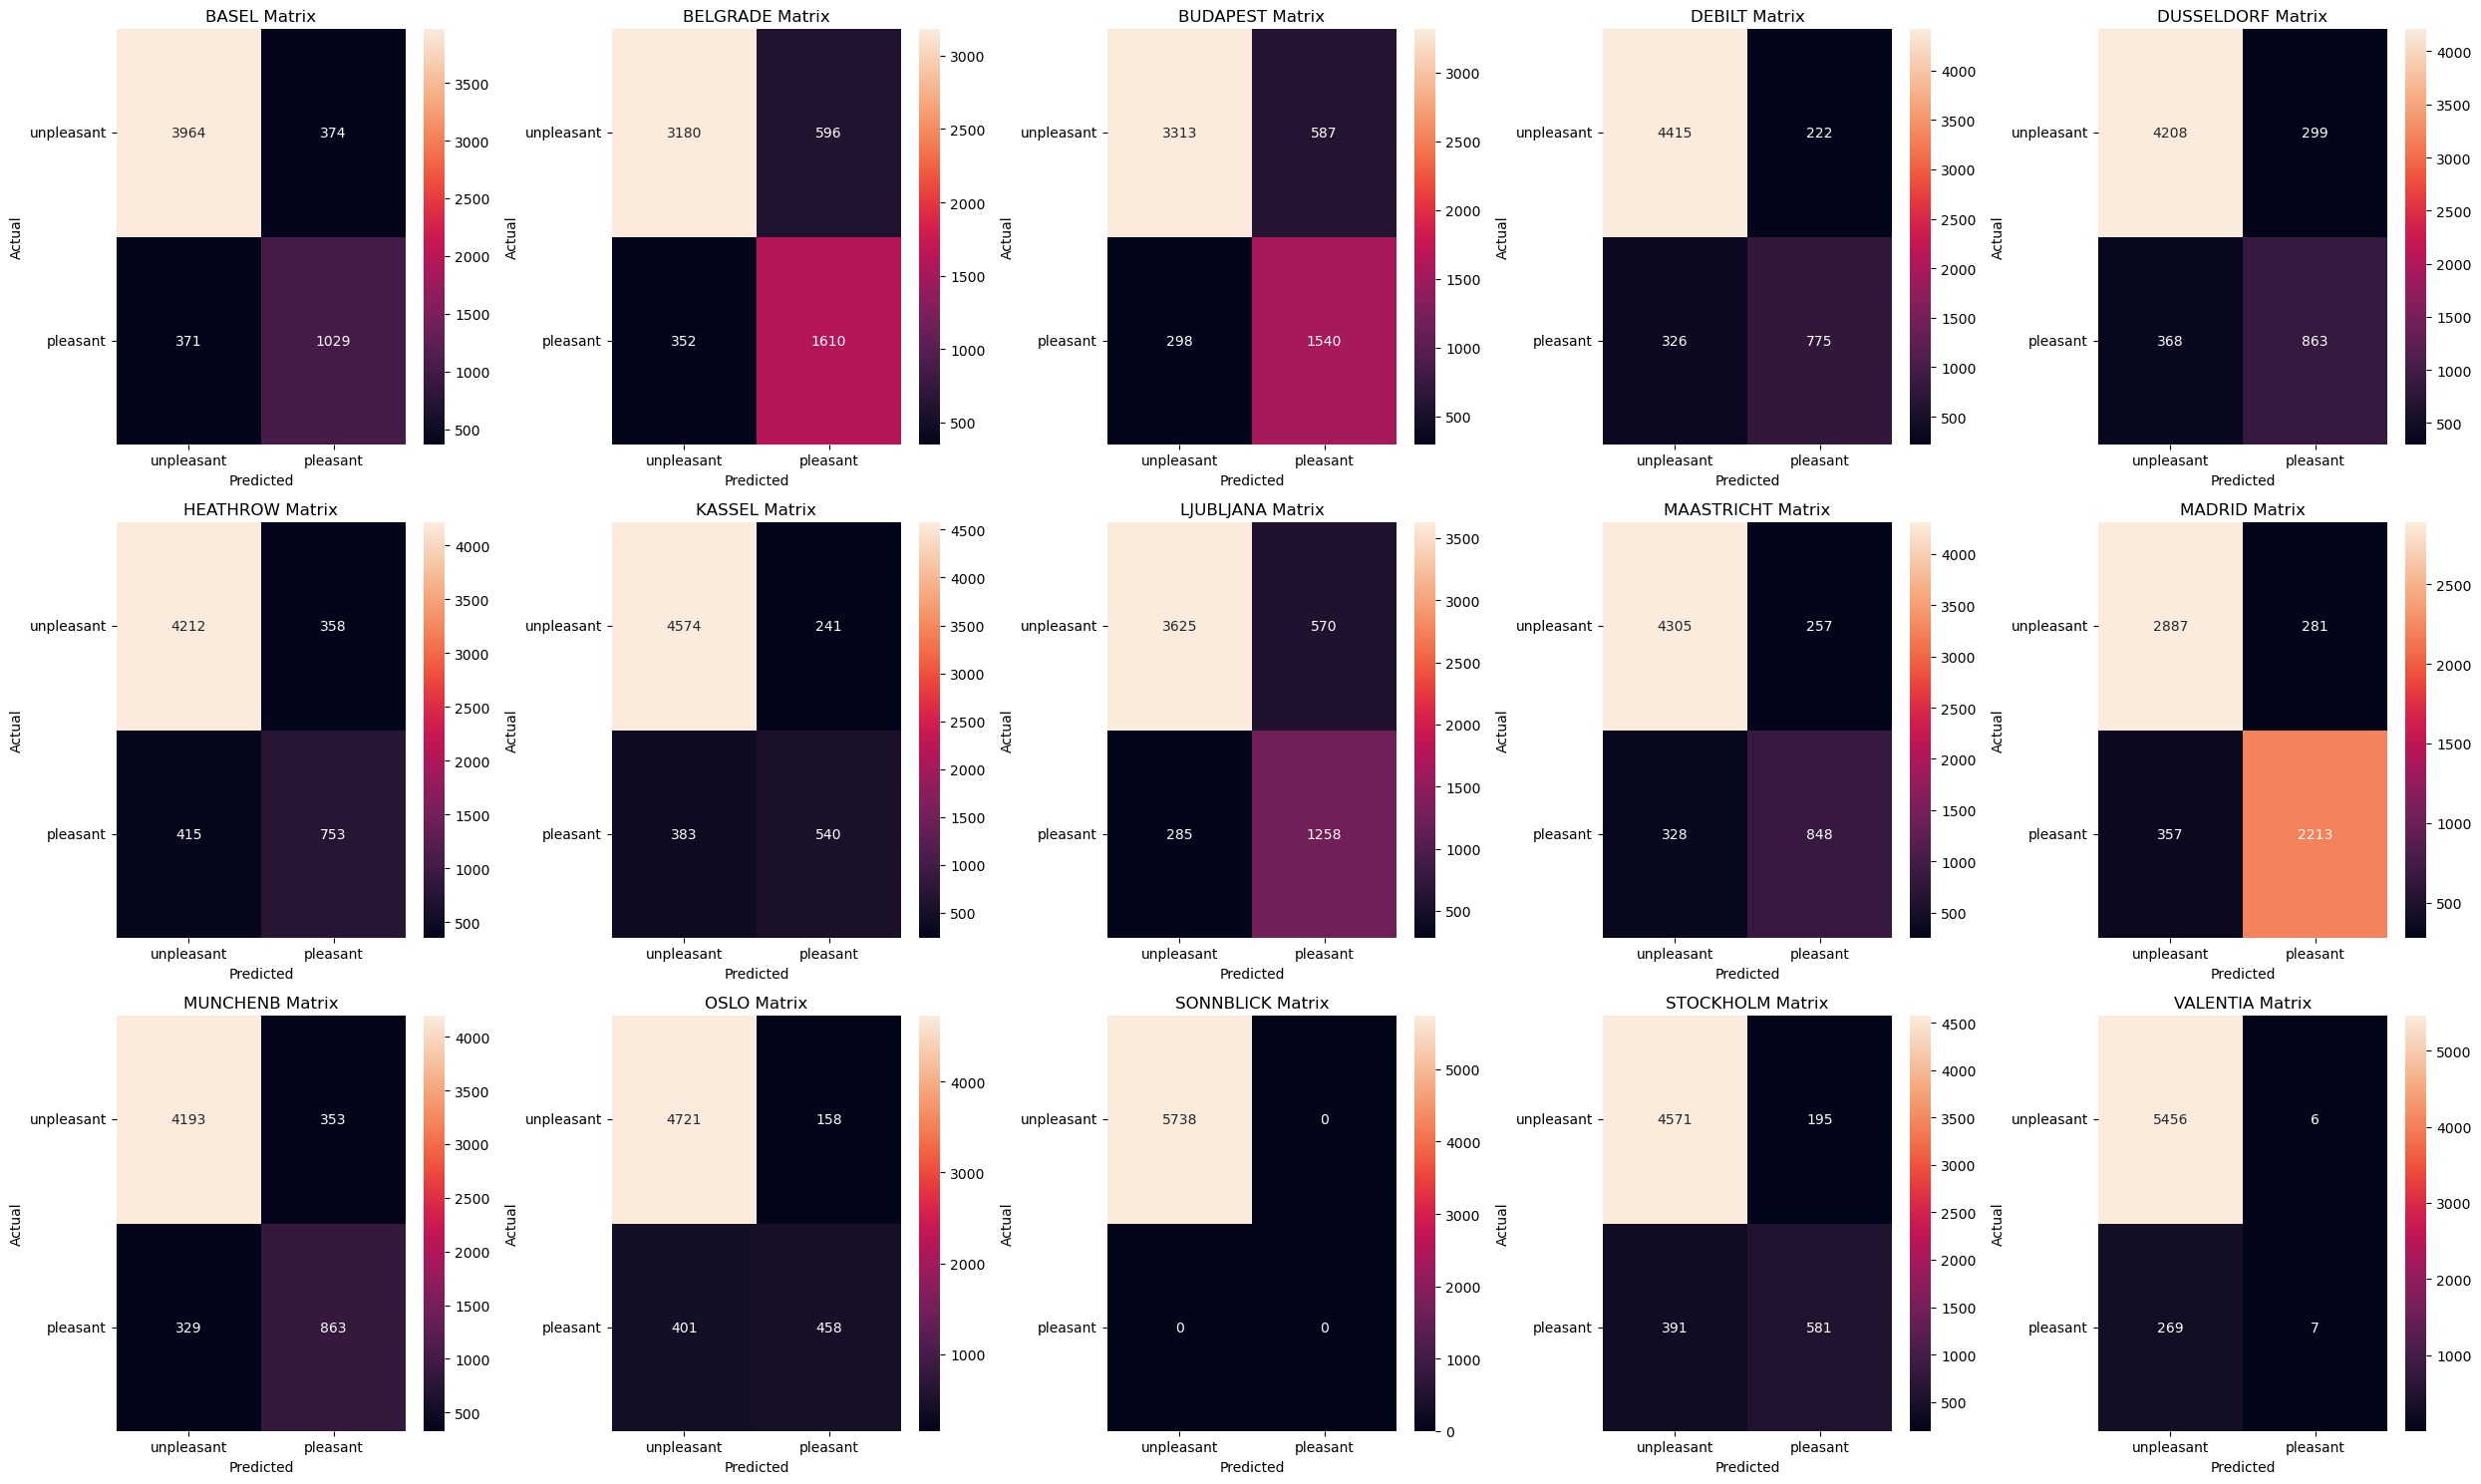

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()

key = "_pleasant_weather"
labels = ['unpleasant', 'pleasant']  # Label 0 = unpleasant, 1 = pleasant
count = 0

# Adjust subplot grid size based on number of locations
rows = 3
cols = 5
fig, ax = plt.subplots(rows, cols, figsize=(25, 15))

for i in range(rows):
    for j in range(cols):
        if count >= len(locations):
            ax[i, j].axis('off')  # Hide unused subplot
            continue

        name = locations[count]
        true_vals = y_test.loc[:, name + key]
        pred_vals = y_pred[:, count]

        cm = confusion_matrix(true_vals, pred_vals, labels=[0, 1])
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])

        ax[i, j].set_xlabel('Predicted')
        ax[i, j].set_ylabel('Actual')
        ax[i, j].set_title(f"{name} Matrix")
        ax[i, j].set_xticklabels(labels)
        ax[i, j].set_yticklabels(labels, rotation=0)

        count += 1

plt.tight_layout()
plt.show()

In [ ]:
# Try a more complex model to get better prediction

# 5 ANN model 2

In [222]:
# Try the model that worked well for Iris types exercise

In [221]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 20, 10), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 20, 10), max_iter=1000)

In [225]:
# Model converged

In [227]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.49970950499651406
0.4890205646566748


In [229]:
# Classification report to check other metrics
y_pred = mlp.predict(X_test)  
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76      1400
           1       0.79      0.84      0.81      1962
           2       0.80      0.83      0.81      1838
           3       0.82      0.67      0.74      1101
           4       0.80      0.60      0.68      1231
           5       0.72      0.70      0.71      1168
           6       0.83      0.59      0.69       923
           7       0.78      0.80      0.79      1543
           8       0.82      0.68      0.75      1176
           9       0.86      0.96      0.91      2570
          10       0.76      0.71      0.74      1192
          11       0.72      0.77      0.74       859
          12       0.00      0.00      0.00         0
          13       0.74      0.74      0.74       972
          14       0.69      0.39      0.50       276

   micro avg       0.79      0.76      0.78     18211
   macro avg       0.73      0.67      0.69     18211
weighted avg       0.79   

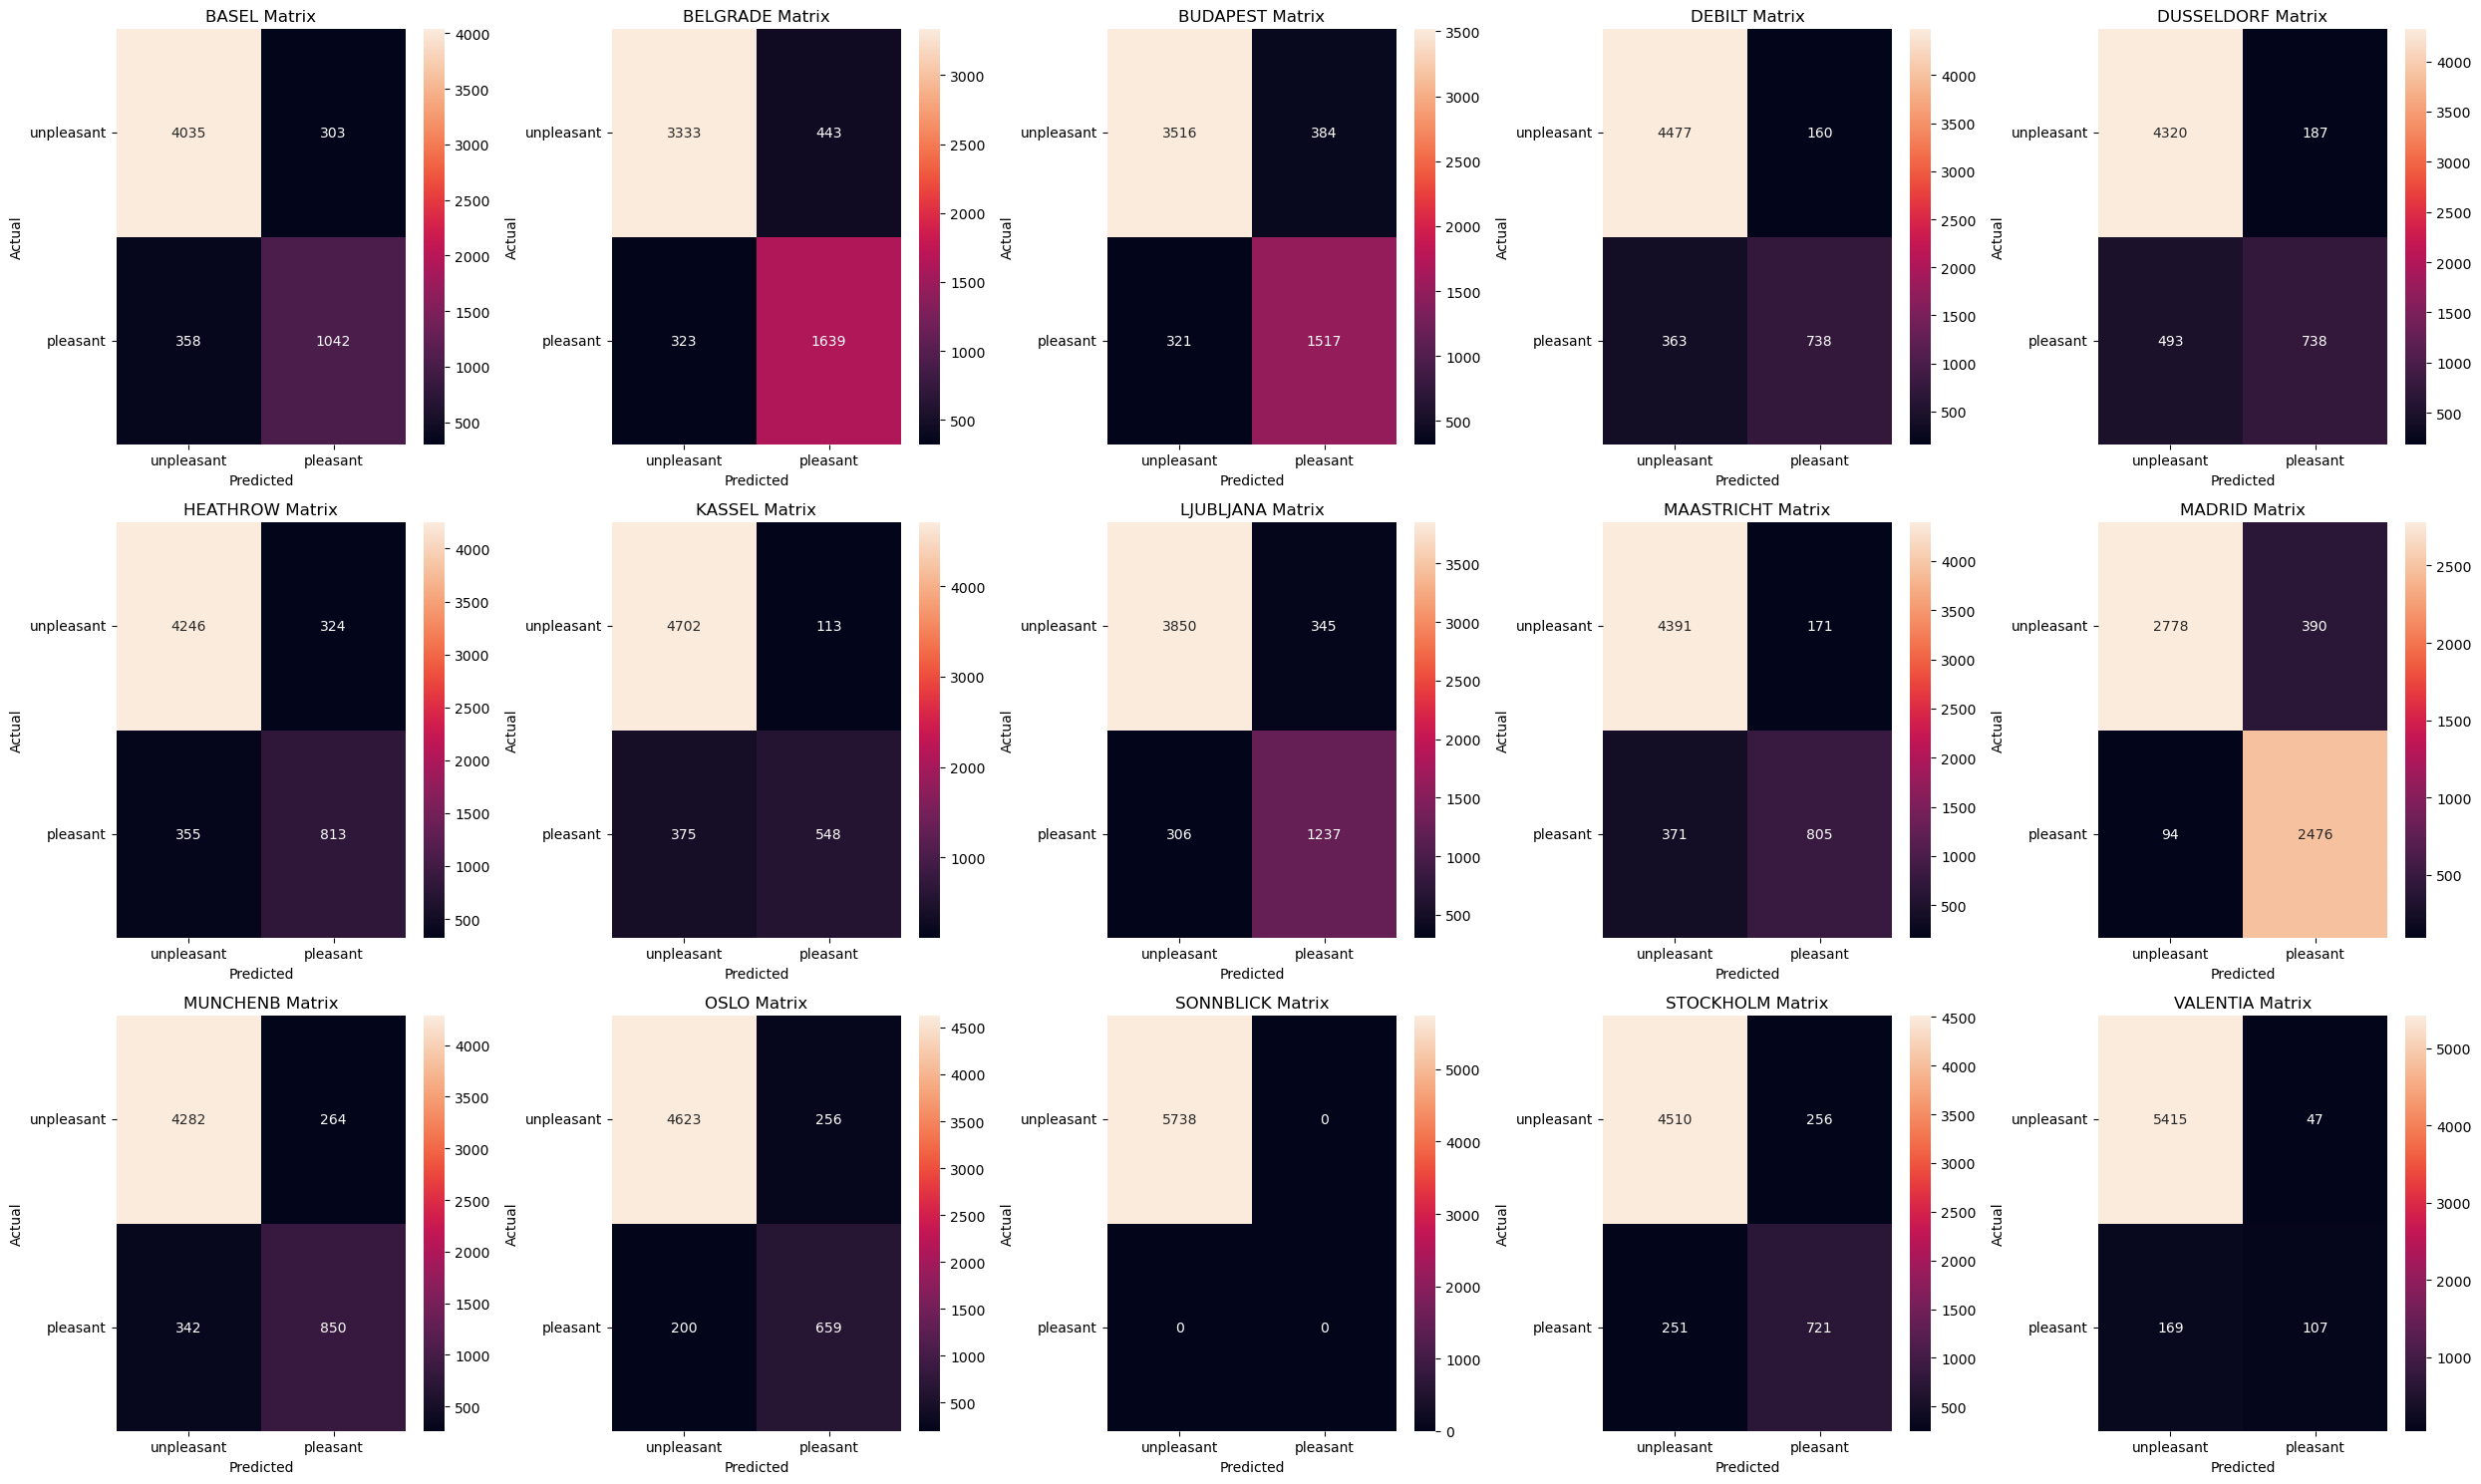

In [231]:
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()

key = "_pleasant_weather"
labels = ['unpleasant', 'pleasant']  # Label 0 = unpleasant, 1 = pleasant
count = 0

# Adjust subplot grid size based on number of locations
rows = 3
cols = 5
fig, ax = plt.subplots(rows, cols, figsize=(25, 15))

for i in range(rows):
    for j in range(cols):
        if count >= len(locations):
            ax[i, j].axis('off')  # Hide unused subplot
            continue

        name = locations[count]
        true_vals = y_test.loc[:, name + key]
        pred_vals = y_pred[:, count]

        cm = confusion_matrix(true_vals, pred_vals, labels=[0, 1])
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])

        ax[i, j].set_xlabel('Predicted')
        ax[i, j].set_ylabel('Actual')
        ax[i, j].set_title(f"{name} Matrix")
        ax[i, j].set_xticklabels(labels)
        ax[i, j].set_yticklabels(labels, rotation=0)

        count += 1

plt.tight_layout()
plt.show()

There is slight improvement in model performance. But we still want much better performance from it. Need to change the parameters more drastically. 

# 6 ANN model 3

In [234]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 20), max_iter=1000, tol=0.00001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 20), max_iter=1000, tol=1e-05)

In [236]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.5281780153381361
0.5001742767514814


In [238]:
# Classification report to check other metrics
y_pred = mlp.predict(X_test)  
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1400
           1       0.81      0.84      0.82      1962
           2       0.83      0.80      0.81      1838
           3       0.80      0.71      0.75      1101
           4       0.78      0.67      0.72      1231
           5       0.77      0.73      0.75      1168
           6       0.80      0.68      0.74       923
           7       0.79      0.77      0.78      1543
           8       0.82      0.72      0.77      1176
           9       0.88      0.93      0.91      2570
          10       0.77      0.77      0.77      1192
          11       0.76      0.76      0.76       859
          12       0.00      0.00      0.00         0
          13       0.83      0.62      0.71       972
          14       0.74      0.46      0.57       276

   micro avg       0.81      0.77      0.79     18211
   macro avg       0.75      0.68      0.71     18211
weighted avg       0.81   

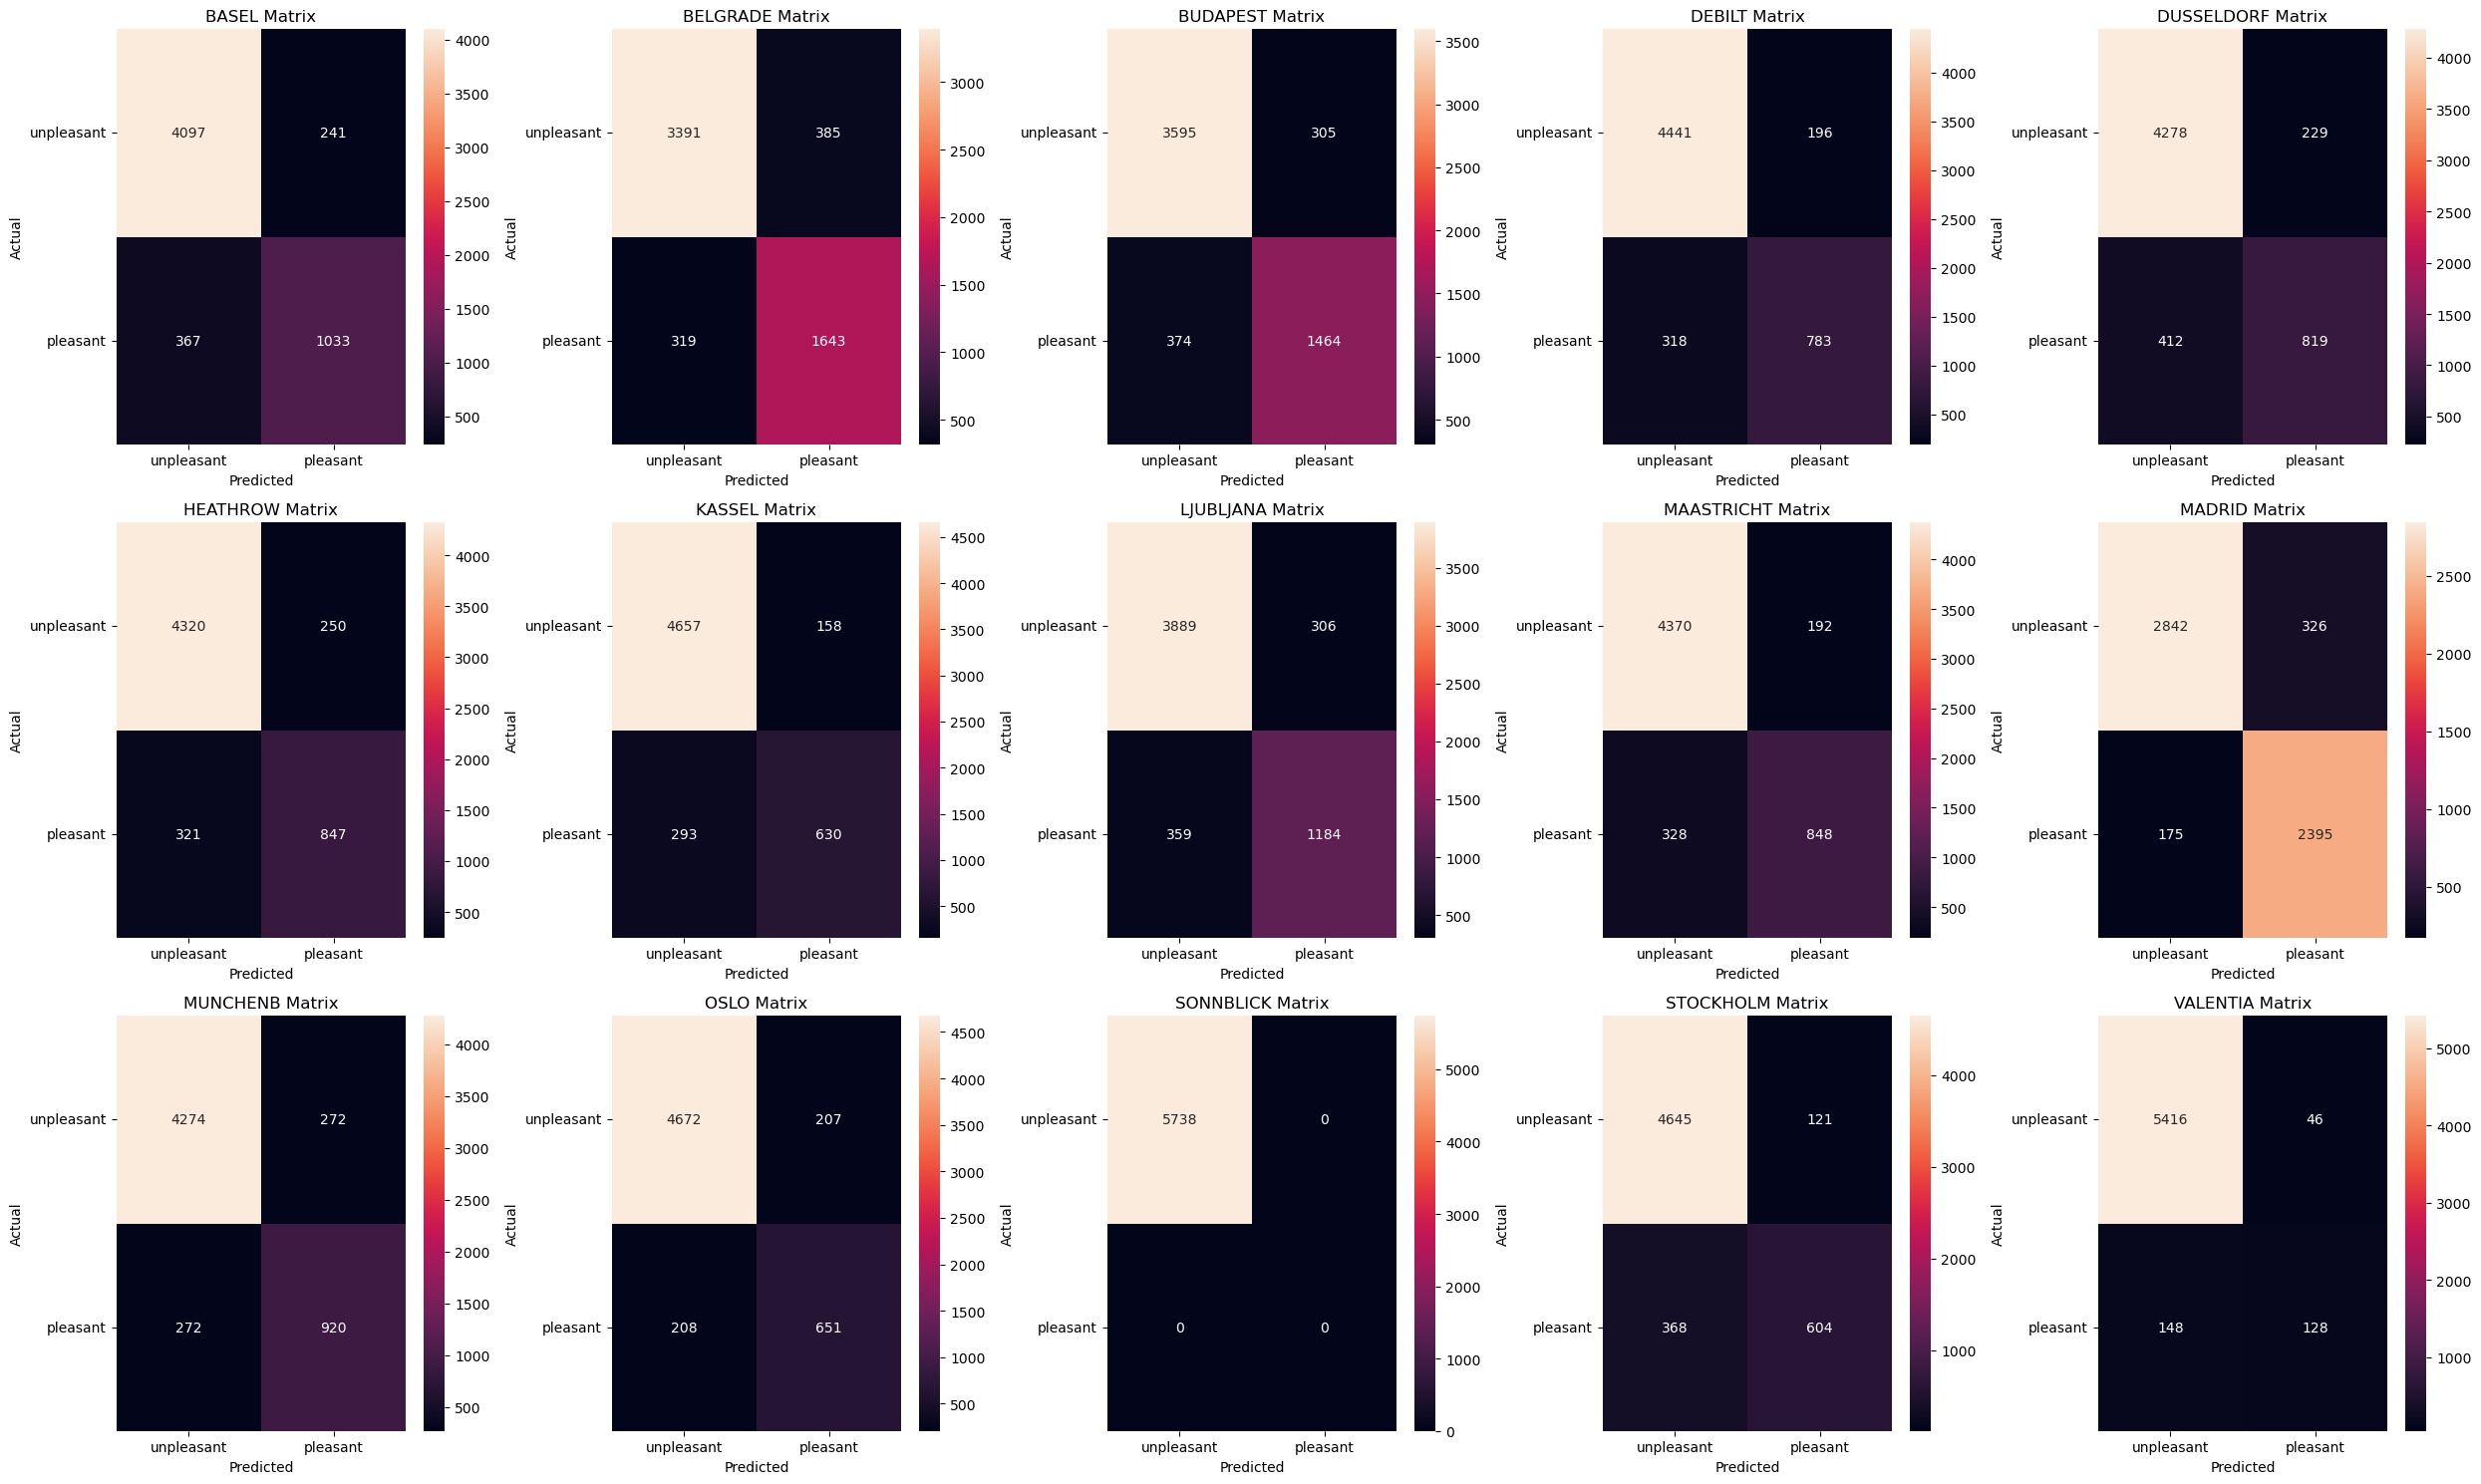

In [240]:
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()

key = "_pleasant_weather"
labels = ['unpleasant', 'pleasant']  # Label 0 = unpleasant, 1 = pleasant
count = 0

# Adjust subplot grid size based on number of locations
rows = 3
cols = 5
fig, ax = plt.subplots(rows, cols, figsize=(25, 15))

for i in range(rows):
    for j in range(cols):
        if count >= len(locations):
            ax[i, j].axis('off')  # Hide unused subplot
            continue

        name = locations[count]
        true_vals = y_test.loc[:, name + key]
        pred_vals = y_pred[:, count]

        cm = confusion_matrix(true_vals, pred_vals, labels=[0, 1])
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])

        ax[i, j].set_xlabel('Predicted')
        ax[i, j].set_ylabel('Actual')
        ax[i, j].set_title(f"{name} Matrix")
        ax[i, j].set_xticklabels(labels)
        ax[i, j].set_yticklabels(labels, rotation=0)

        count += 1

plt.tight_layout()
plt.show()

# 7 ANN model 4

In [250]:
mlp = MLPClassifier(hidden_layer_sizes=(1000, 500, 100), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(1000, 500, 100), max_iter=1000)

In [252]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.7738786892865442
0.45468804461484835


In [254]:
# Classification report to check other metrics
y_pred = mlp.predict(X_test)  
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1400
           1       0.74      0.86      0.80      1962
           2       0.76      0.84      0.80      1838
           3       0.69      0.79      0.74      1101
           4       0.69      0.75      0.72      1231
           5       0.61      0.82      0.70      1168
           6       0.69      0.76      0.72       923
           7       0.76      0.78      0.77      1543
           8       0.72      0.77      0.75      1176
           9       0.85      0.91      0.88      2570
          10       0.73      0.74      0.74      1192
          11       0.71      0.70      0.71       859
          12       0.00      0.00      0.00         0
          13       0.73      0.72      0.72       972
          14       0.56      0.55      0.55       276

   micro avg       0.74      0.80      0.76     18211
   macro avg       0.67      0.72      0.69     18211
weighted avg       0.74   

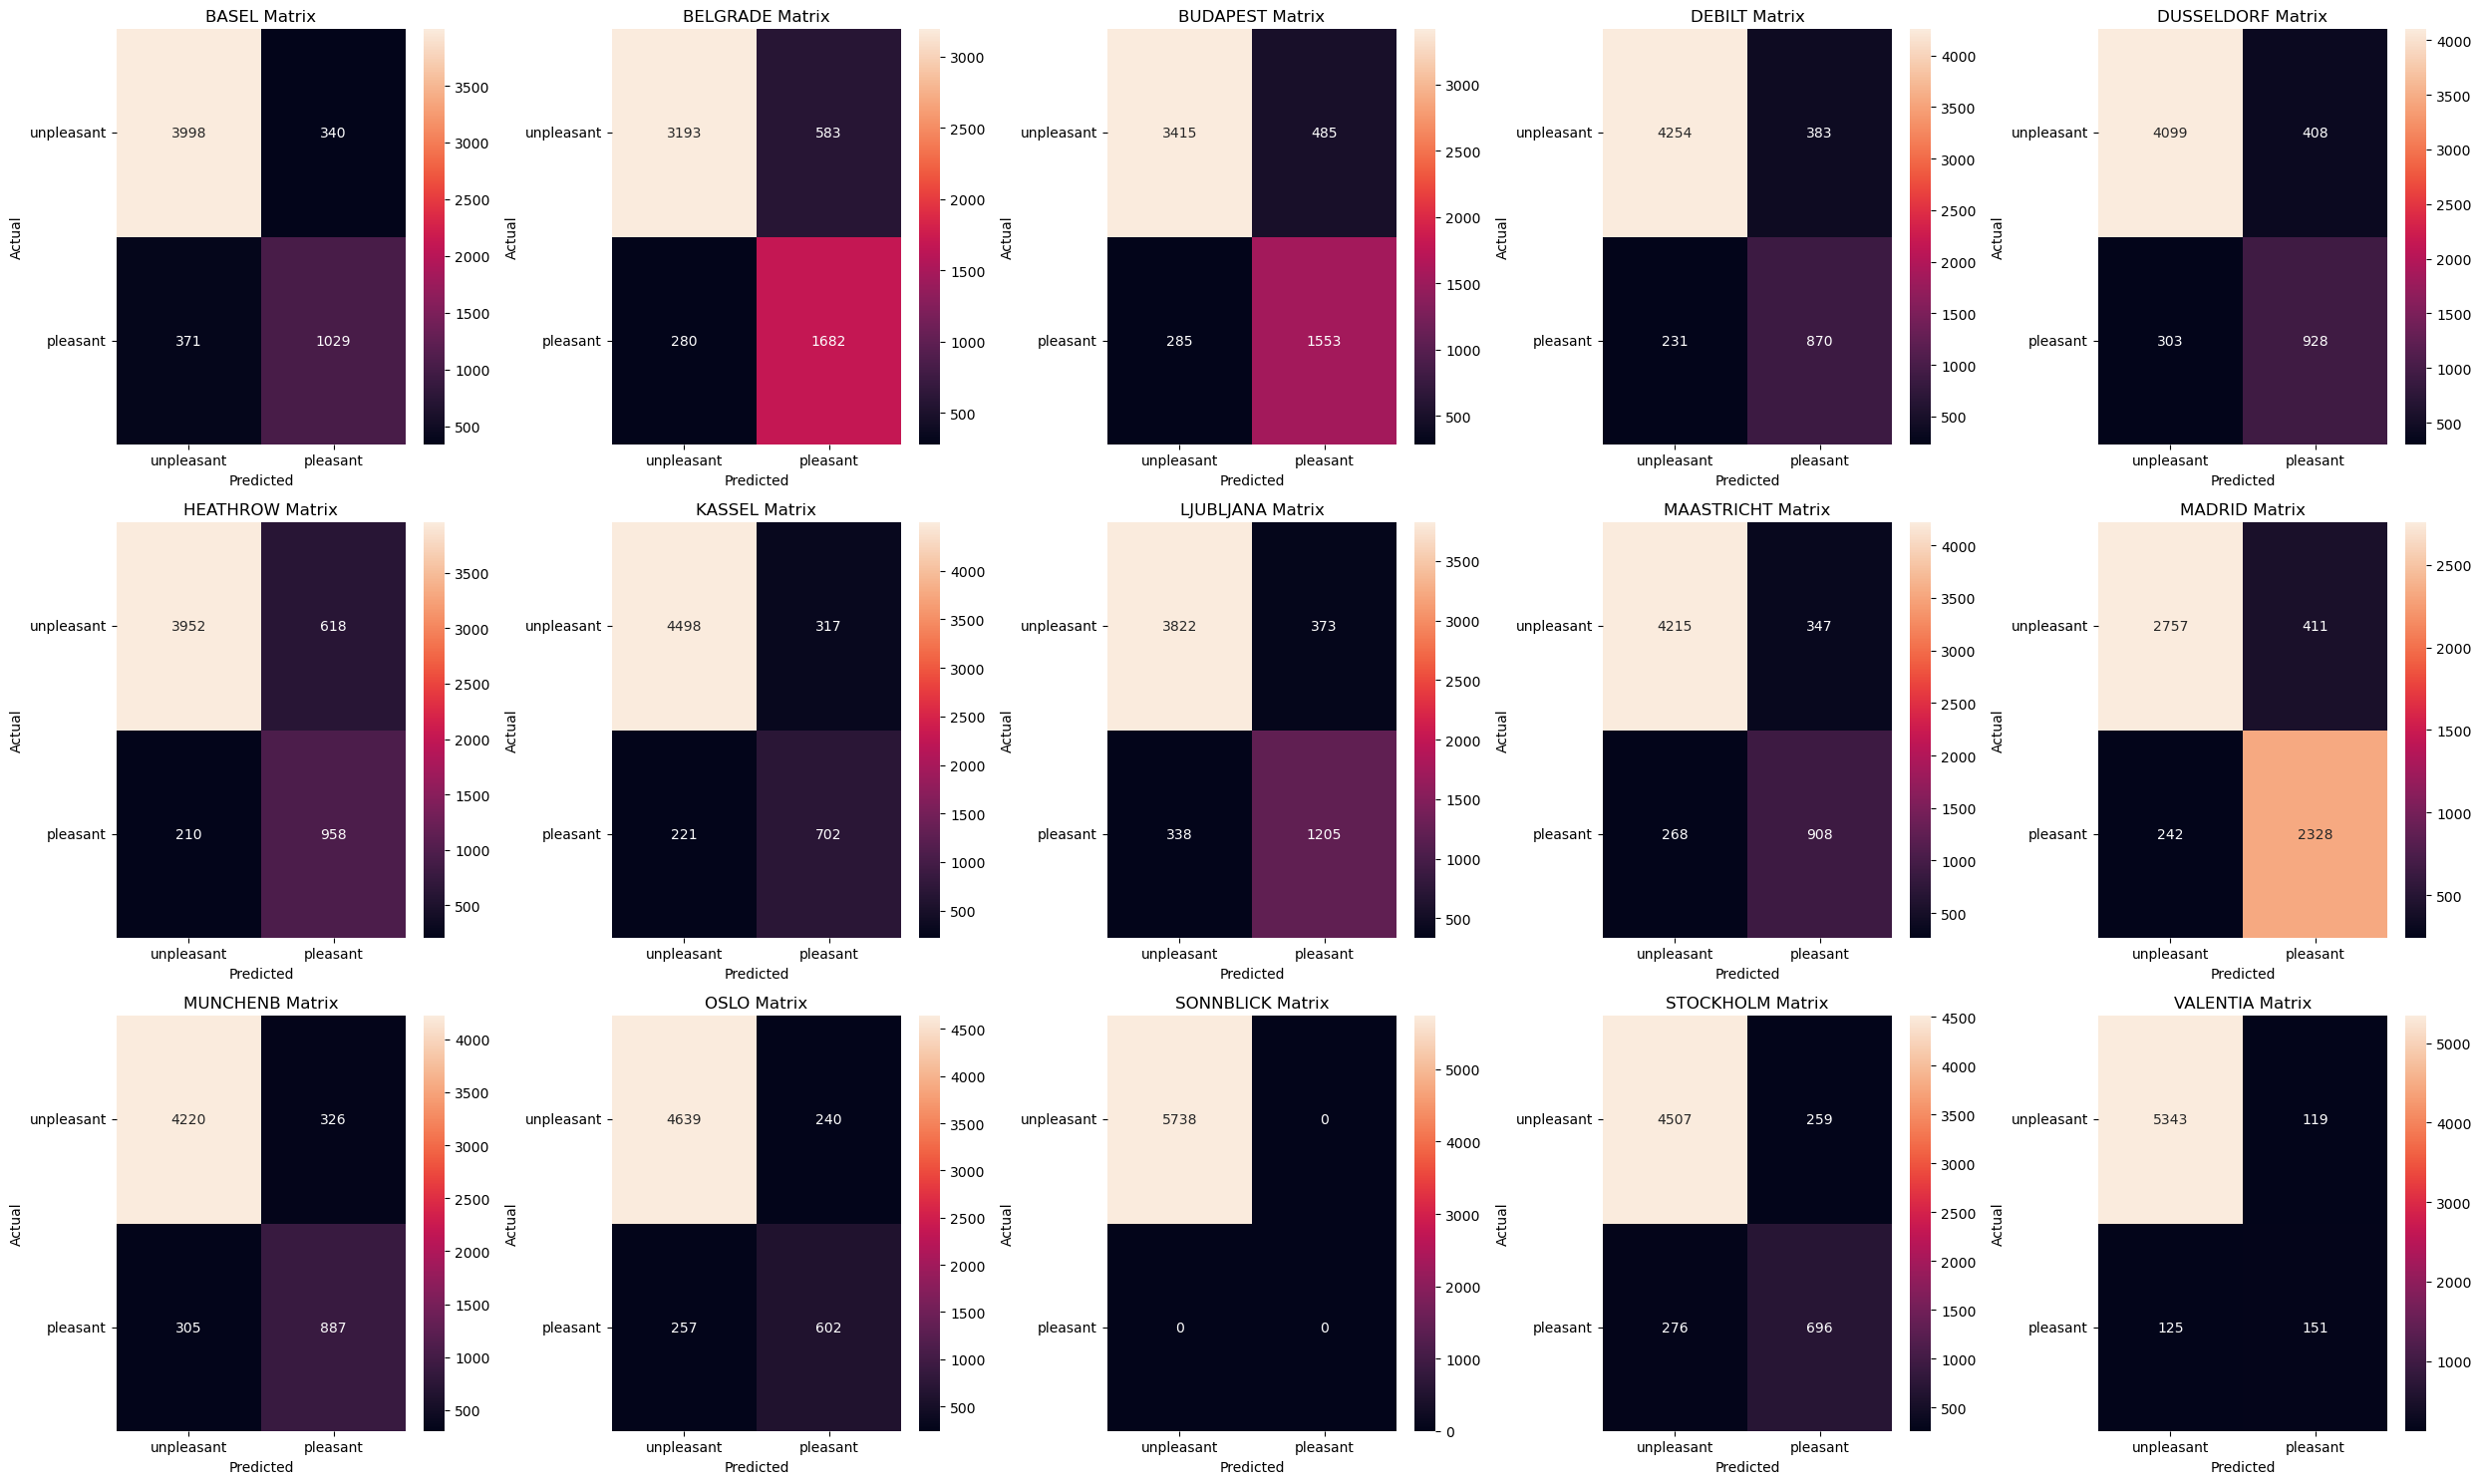

In [256]:
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()

key = "_pleasant_weather"
labels = ['unpleasant', 'pleasant']  # Label 0 = unpleasant, 1 = pleasant
count = 0

# Adjust subplot grid size based on number of locations
rows = 3
cols = 5
fig, ax = plt.subplots(rows, cols, figsize=(25, 15))

for i in range(rows):
    for j in range(cols):
        if count >= len(locations):
            ax[i, j].axis('off')  # Hide unused subplot
            continue

        name = locations[count]
        true_vals = y_test.loc[:, name + key]
        pred_vals = y_pred[:, count]

        cm = confusion_matrix(true_vals, pred_vals, labels=[0, 1])
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])

        ax[i, j].set_xlabel('Predicted')
        ax[i, j].set_ylabel('Actual')
        ax[i, j].set_title(f"{name} Matrix")
        ax[i, j].set_xticklabels(labels)
        ax[i, j].set_yticklabels(labels, rotation=0)

        count += 1

plt.tight_layout()
plt.show()

# 8 ANN model 5

In [264]:
mlp = MLPClassifier(hidden_layer_sizes=(1000, 500, 500), max_iter=2000, tol=0.00001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(1000, 500, 500), max_iter=2000, tol=1e-05)

In [266]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.9476528003718336
0.454513767863367


Here we can observe obvious overfitting, meaning that the model learned the training data too well, but it doesn’t understand the true underlying patterns in the data, so this learning does not generalize. 

In [268]:
# Classification report to check other metrics
y_pred = mlp.predict(X_test)  
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73      1400
           1       0.76      0.81      0.79      1962
           2       0.77      0.81      0.79      1838
           3       0.71      0.75      0.73      1101
           4       0.69      0.75      0.72      1231
           5       0.66      0.74      0.70      1168
           6       0.72      0.72      0.72       923
           7       0.76      0.79      0.77      1543
           8       0.70      0.75      0.72      1176
           9       0.85      0.89      0.87      2570
          10       0.73      0.75      0.74      1192
          11       0.67      0.71      0.69       859
          12       0.00      0.00      0.00         0
          13       0.73      0.65      0.69       972
          14       0.60      0.47      0.53       276

   micro avg       0.74      0.77      0.76     18211
   macro avg       0.67      0.69      0.68     18211
weighted avg       0.74   

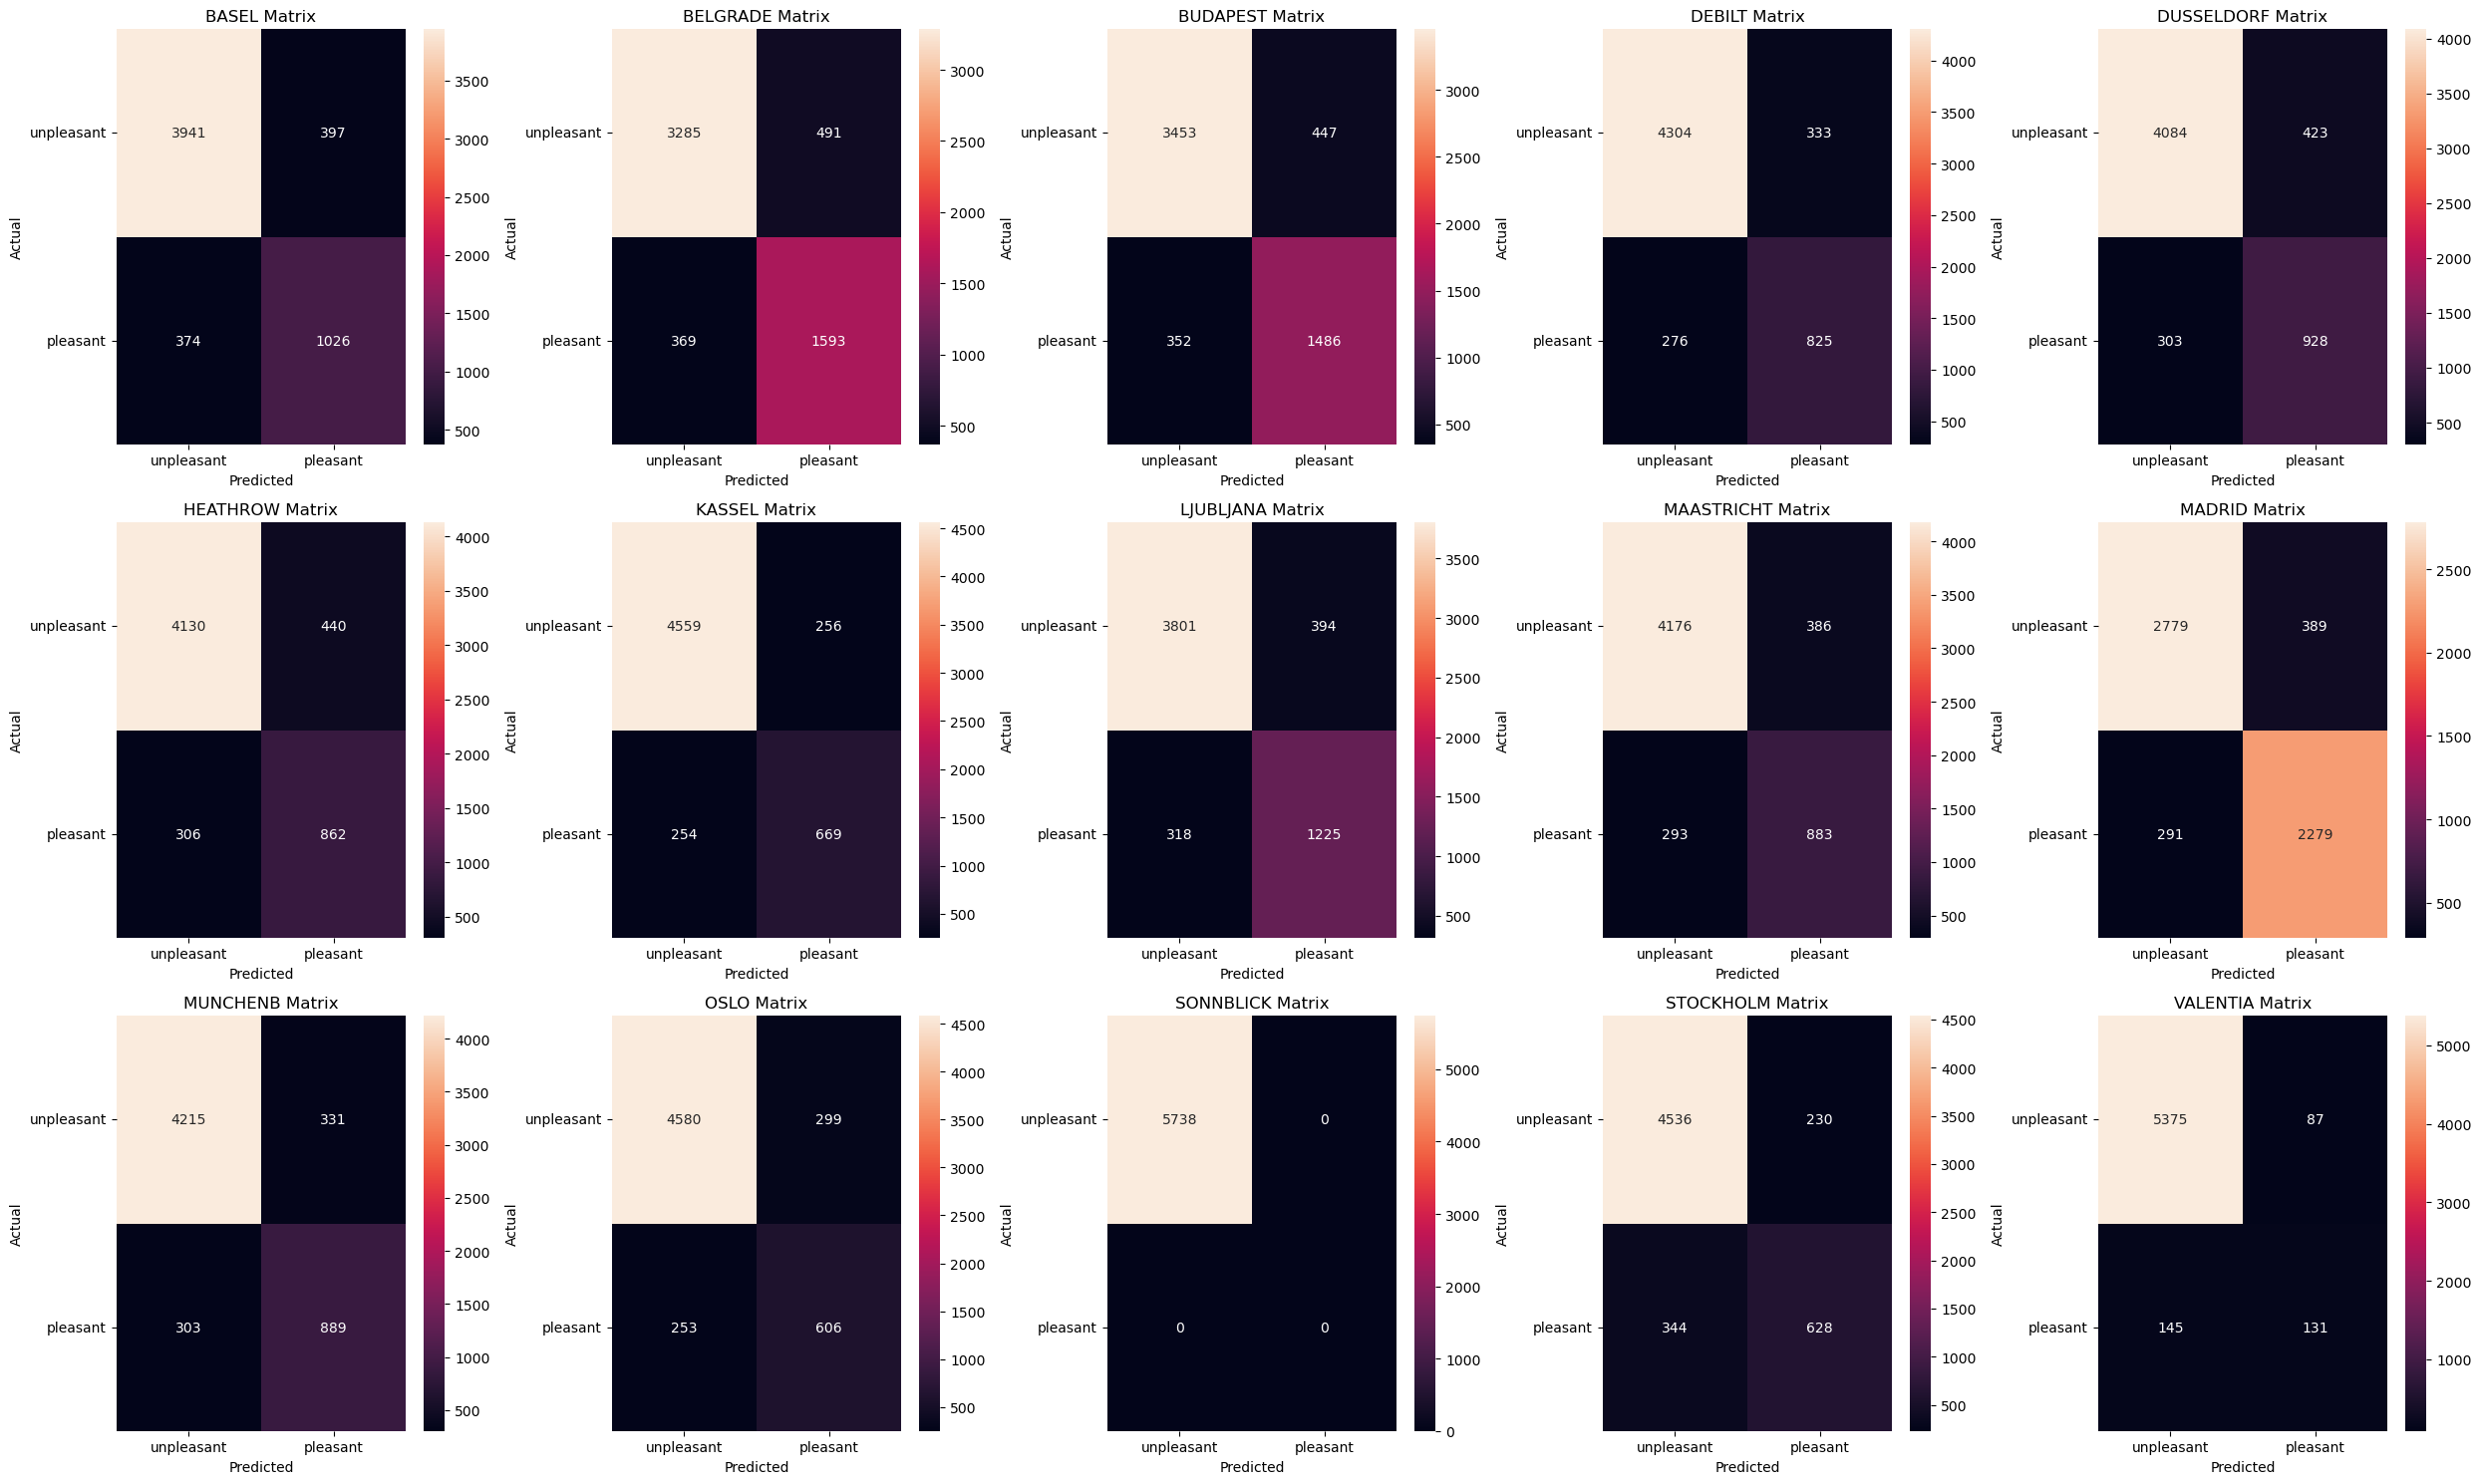

In [270]:
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()

key = "_pleasant_weather"
labels = ['unpleasant', 'pleasant']  # Label 0 = unpleasant, 1 = pleasant
count = 0

# Adjust subplot grid size based on number of locations
rows = 3
cols = 5
fig, ax = plt.subplots(rows, cols, figsize=(25, 15))

for i in range(rows):
    for j in range(cols):
        if count >= len(locations):
            ax[i, j].axis('off')  # Hide unused subplot
            continue

        name = locations[count]
        true_vals = y_test.loc[:, name + key]
        pred_vals = y_pred[:, count]

        cm = confusion_matrix(true_vals, pred_vals, labels=[0, 1])
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])

        ax[i, j].set_xlabel('Predicted')
        ax[i, j].set_ylabel('Actual')
        ax[i, j].set_title(f"{name} Matrix")
        ax[i, j].set_xticklabels(labels)
        ax[i, j].set_yticklabels(labels, rotation=0)

        count += 1

plt.tight_layout()
plt.show()

There are several possible problems with the model. It is possible that only looking at average temperatures is not enough for an accurate prediction of pleasant or unpleasant day. It is likely that a model with more factors to work with will produce better predictions. It is possible there are not enough readings to work with. Since more readings are not available, a simpler model might actually do better with a relatively small dataset. More complex is not always better. We also have unbalanced classes. In some situations this needs to be addressed in the model. 